In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from dataclasses import dataclass
import numpy as np
from matplotlib import (
    pyplot as plt
)
import math
import random


@dataclass
class wave:
    amplitude: float
    phase_shift: float
    vertical_shift: float
    period: float

    def eval(self, x: float):
        return (
            self.amplitude * math.sin(self.period * (x + self.phase_shift))
            + self.vertical_shift
        )


def make_wave():
    return wave(
        amplitude=random.uniform(1.0, 3.0),
        phase_shift=random.uniform(0.0, math.pi),
        period=random.uniform(0.01, 3),
        vertical_shift=random.uniform(-4.0, 4.0),
    )

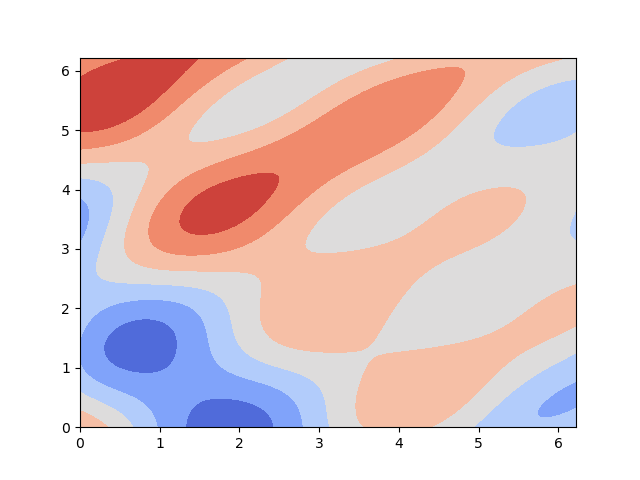

In [5]:
num_waves = 3
n = 100
x_waves = [make_wave() for i in range(0, num_waves)]
y_waves = [make_wave() for i in range(0, num_waves)]
angles = [random.uniform(0, 2 * math.pi) for i in range(0, num_waves)]

x = np.arange(0, 2 * math.pi, 2 * math.pi / n)
y = np.arange(0, 2 * math.pi, 2 * math.pi / n)

surf = np.zeros((n, n))
for i in range(0, n):
    for j in range(0, n):
        for r in angles:
            xrot = x[i] * math.cos(r) + -y[j] * math.sin(r)
            yrot = x[i] * math.sin(r) + y[j] * math.cos(r)
            xx = sum([wave.eval(xrot) for wave in x_waves])
            yy = sum([wave.eval(yrot) for wave in y_waves])
            surf[i, j] = xx + yy

fig = plt.figure()

plt.contourf(x, y, surf, cmap="coolwarm")

plt.show()
